In [1]:
import numpy as np
import sys
sys.path.append('G:\\My Drive\\Stanford\\research\\FEL\\CSR\\pyDFCSR')
sys.path.append('G:\\My Drive\\Stanford\\research\\FEL\\CSR\\pyDFCSR\\pyDFCSR_2D')
from r_gen6 import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from deposit import histogram_cic_2d
from distgen import Generator
from SGolay_filter import *
import time

In [2]:
def plot_3d_surface(x, y, data, colormap = 'hot', title = None):

    X, Y = np.meshgrid(x, y, indexing='ij')  # `plot_surface` expects `x` and `y` data to be 2D

    # Creating figure
    fig = plt.figure(figsize =(14, 9))
    ax = plt.axes(projection ='3d')

    # Creating color map
    my_cmap = plt.get_cmap(colormap)

    # Creating plot
    surf = ax.plot_surface(X, Y, data,
                           cmap = my_cmap,
                           edgecolor ='none')

    fig.colorbar(surf, ax = ax,
                 shrink = 0.5, aspect = 5)

    if title:
        ax.set_title(title)



    # show plot
    plt.show()

## Test derivative

### Generate beam

In [32]:
gen = Generator('../input/init_beam.yaml', verbose=0)
gen.run()
pg = gen.particles
particles = np.vstack((pg.x, pg.xp, pg.y, pg.yp, pg.z, pg.gamma)).T
particles[:,5] = (particles[:,5] - np.mean(particles[:,5]))/np.mean(particles[:,5])

In [33]:
from r_gen6 import *
R6 = r_gen6(L = 0.0, angle = 0.0)
particles = np.matmul(R6, particles.T).T
x = particles[:, 0]
z = particles[:, 4]
xp = particles[:, 1]

### Test density and its derivative

In [34]:
xbins, zbins = 100, 110
xlim, zlim = 5, 5
sigma_x = np.std(x)
sigma_z = np.std(z)
xmean = np.mean(x)
zmean = np.mean(z)
npart = len(x)
x_grids = np.linspace(xmean-xlim*sigma_x, xmean + xlim*sigma_x, xbins)
z_grids = np.linspace(zmean-zlim*sigma_z, zmean + zlim*sigma_z, zbins)
density = histogram_cic_2d(q1=x, q2=z, w=np.ones(x.shape),
                         nbins_1=xbins, bins_start_1=xmean-xlim*sigma_x, bins_end_1=xmean+xlim*sigma_x,
                         nbins_2=zbins, bins_start_2=zmean-zlim*sigma_z, bins_end_2=zmean +zlim*sigma_z)


vx = histogram_cic_2d(q1=x, q2=z, w=xp,
                         nbins_1=xbins, bins_start_1=xmean-xlim*sigma_x, bins_end_1=xmean+xlim*sigma_x,
                         nbins_2=zbins, bins_start_2=zmean-zlim*sigma_z, bins_end_2=zmean +zlim*sigma_z)
threshold = np.max(density)/100
vx[density > threshold] /= density[density > threshold]
vx[density < threshold] = 0
dsum = np.trapz(np.trapz(density, x_grids, axis = 0),z_grids)
density /=dsum

np.gradient, density_x max 46827599.07002047


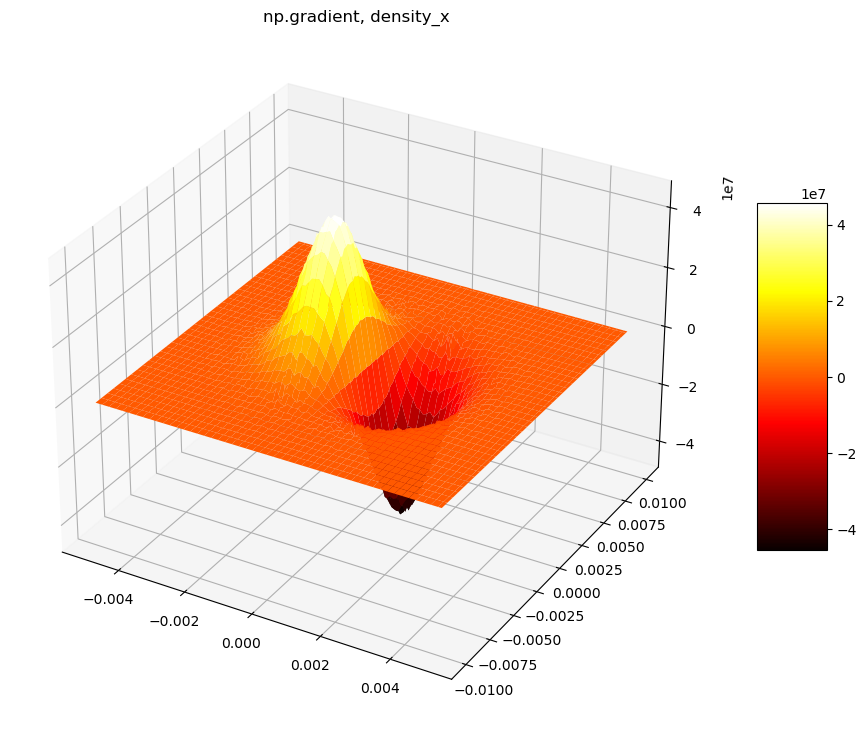

sgolay, density_x max 46362261.28172758


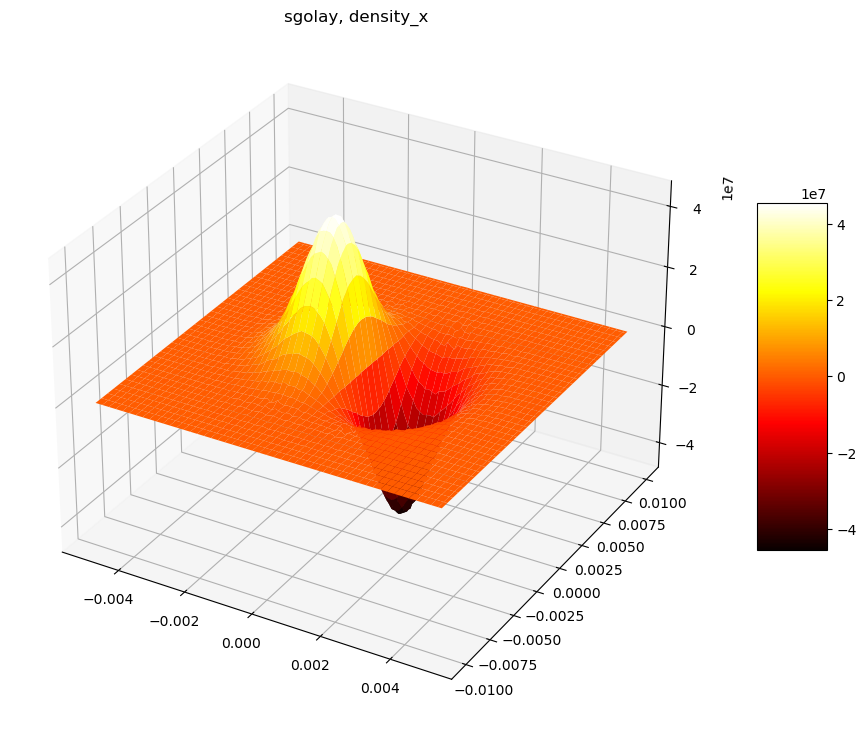

sgolay, density_z max 23411468.892503753


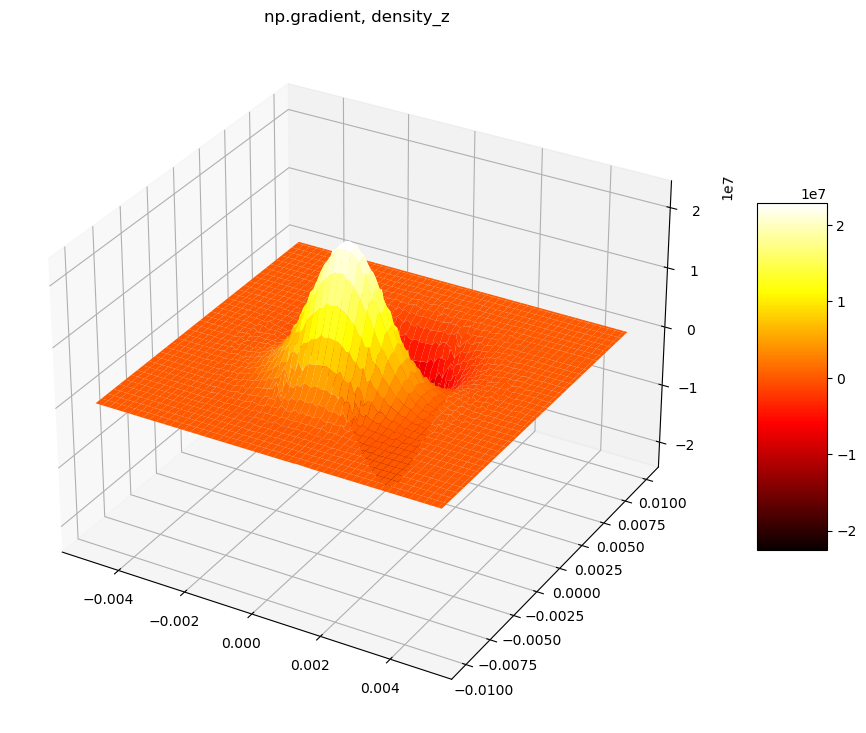

sgolay, density_z max 23299077.456845593


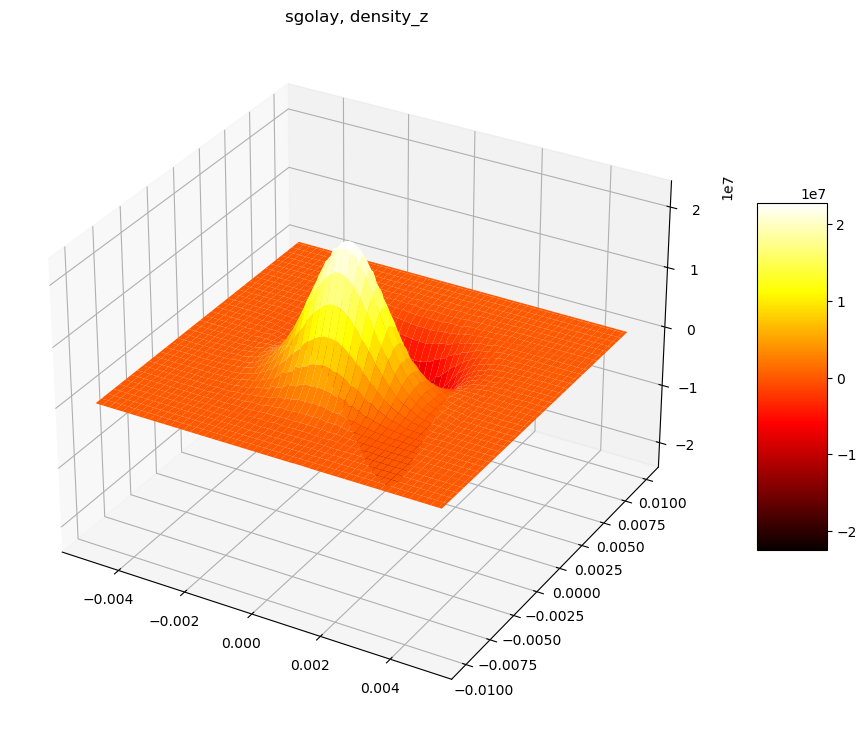

In [35]:
density_x, density_z = np.gradient(density, x_grids, z_grids)
print('np.gradient, density_x max',np.max(density_x))
plot_3d_surface(x_grids, z_grids,density_x, colormap = 'hot', title = 'np.gradient, density_x')


density_x, density_z = sgolay2d(density,3,1,derivative = 'both')
density_x /= np.mean(np.diff(x_grids))
density_z /= np.mean(np.diff(z_grids))
print('sgolay, density_x max',np.max(density_x))
plot_3d_surface(x_grids, z_grids,density_x, colormap = 'hot', title = 'sgolay, density_x')

density_x, density_z = np.gradient(density, x_grids, z_grids)
print('sgolay, density_z max',np.max(density_z))
plot_3d_surface(x_grids, z_grids,density_z, colormap = 'hot', title = 'np.gradient, density_z')


density_x, density_z = sgolay2d(density,3,1,derivative = 'both')
density_x /= np.mean(np.diff(x_grids))
density_z /= np.mean(np.diff(z_grids))
print('sgolay, density_z max',np.max(density_z))
plot_3d_surface(x_grids, z_grids,density_z, colormap = 'hot', title = 'sgolay, density_z')


## Test velocity derivative

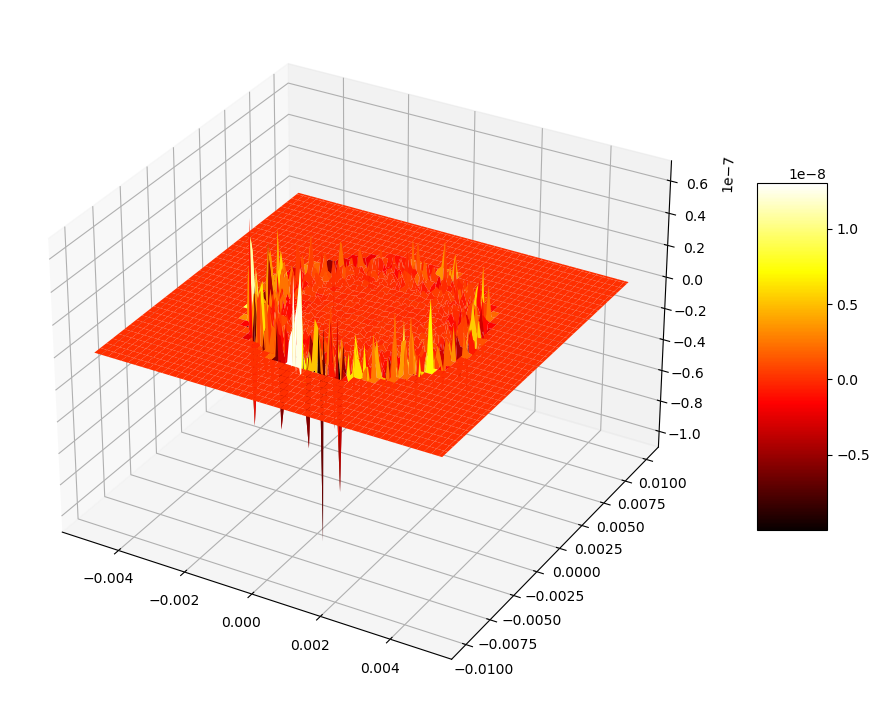

In [36]:
plot_3d_surface(x_grids, z_grids, vx)

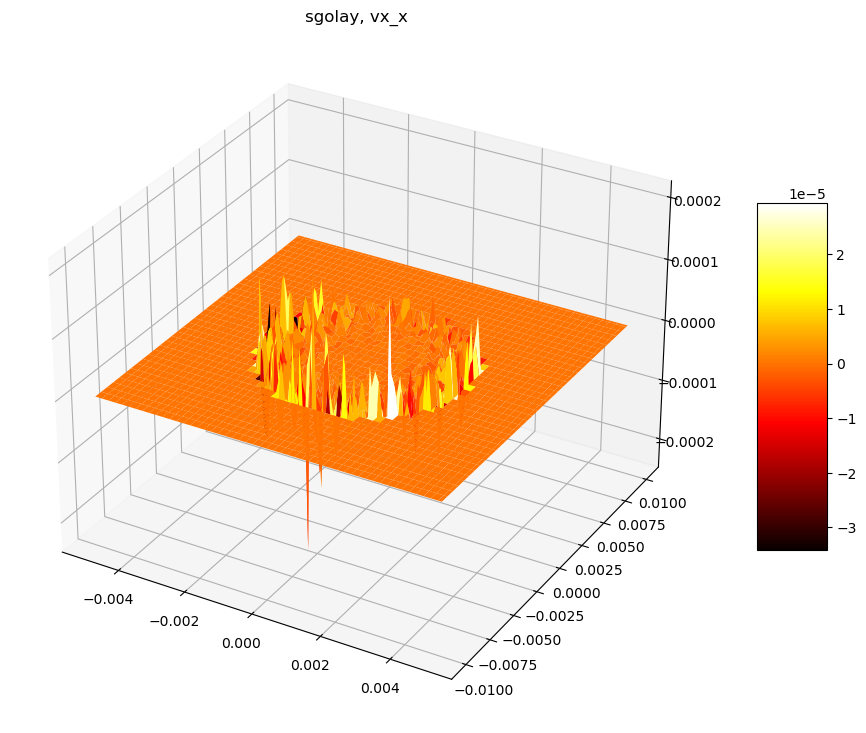

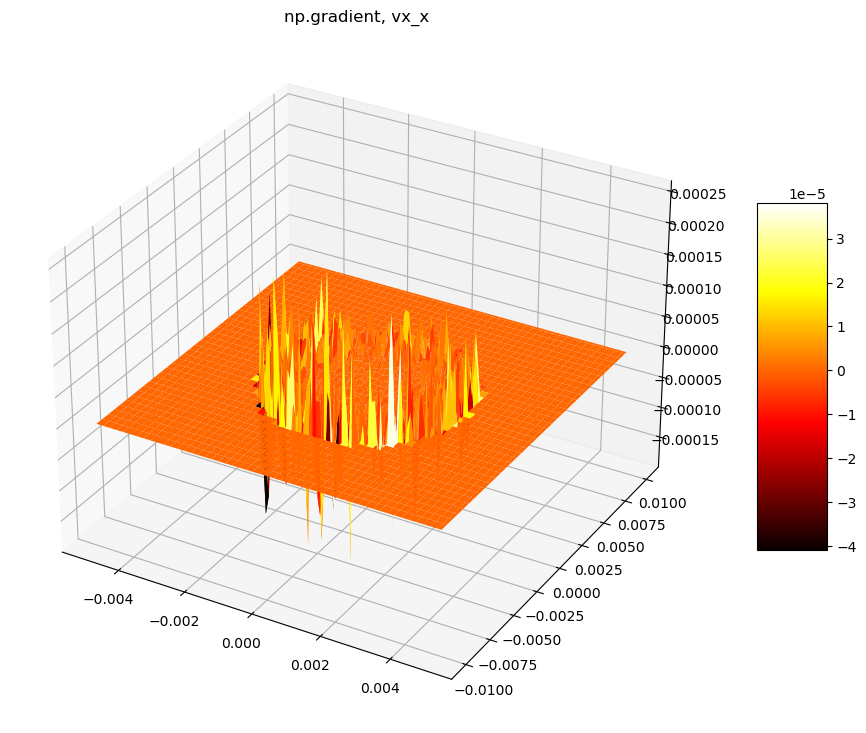

In [37]:
vx_x, vx_z=sgolay2d (vx, 3, 2, derivative='both')
threshold = np.max(density)/50
vx_x[density<threshold] = 0
vx_x /= np.mean(np.diff(x_grids))
plot_3d_surface(x_grids, z_grids,vx_x, colormap = 'hot', title = 'sgolay, vx_x')

vx_x, vx_z = np.gradient(vx, x_grids, z_grids)
threshold = np.max(density)/50
vx_x[density<threshold] = 0
plot_3d_surface(x_grids, z_grids,vx_x, colormap = 'hot', title = 'np.gradient, vx_x')

## Test distgen

In [40]:
input_file = '../input/init_beam.yaml'
# Create a generator object
from distgen import Generator
gen = Generator(input_file, verbose=0)
gen.run()

<ParticleGroup with 2000000 particles at 0x2798572f400>

In [50]:
pg  = gen.particles
pg.dp_p

AttributeError: 'ParticleGroup' object has no attribute 'dp_p'

In [139]:
from yaml_parser import *

In [140]:
lattice_config = parse_yaml('../input/lattice.yaml')

In [152]:
list(lattice_config.keys())[0]

'element_1'

In [5]:
def test_func(a = 1, b= 2, c =3):
    return a+ b+ c

input_dict= {}

print(test_func(**input_dict))

6


In [55]:
temp = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(temp)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [56]:
temp_x, temp_y = np.gradient(temp)

In [57]:
print(temp_x)

[[3. 3. 3.]
 [3. 3. 3.]
 [3. 3. 3.]]


In [58]:
print(temp_y)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [61]:
sgolay2d ( z = temp, window_size = 3, order =1 , derivative='row')

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [51]:
x = float('inf')

In [52]:
print(x)

inf


In [53]:
x > 5

True

In [54]:
-x < 0

True

In [55]:
x= np.array([4,4,4])
y = np.array([5,5,5])
test = (x, y)

In [56]:
x = np.array([6,6,6])

In [57]:
print(test)

(array([4, 4, 4]), array([5, 5, 5]))


In [58]:
test = (x, y)


In [59]:
print(test)

(array([6, 6, 6]), array([5, 5, 5]))


In [60]:
from collections import deque
test = deque([])

In [61]:
test.append(np.array([[1,2],[3,4]]))

In [62]:
test

deque([array([[1, 2],
              [3, 4]])])

In [63]:
test.append(np.array([[5,6],[7,8]]))

In [64]:
test2 = np.array(test)

In [66]:
test2

array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])

In [67]:
test2[0,:,:]

array([[1, 2],
       [3, 4]])

In [69]:
test2[1,:,:]

array([[5, 6],
       [7, 8]])

In [97]:
from scipy.interpolate import interp2d

In [98]:
x = np.arange(-5.01, 5.01, 0.25)
y = np.arange(-5.01, 5.01, 0.25)
xx, yy = np.meshgrid(x, y)
z = np.sin(xx**2+yy**2)
f = interp2d(x, y, z, kind='cubic', fill_value = 0)

In [100]:
xnew = np.arange(-10, 10, 0.25)
ynew = np.arange(-10, 10,0.25)


In [107]:
znew = f(xnew, ynew)

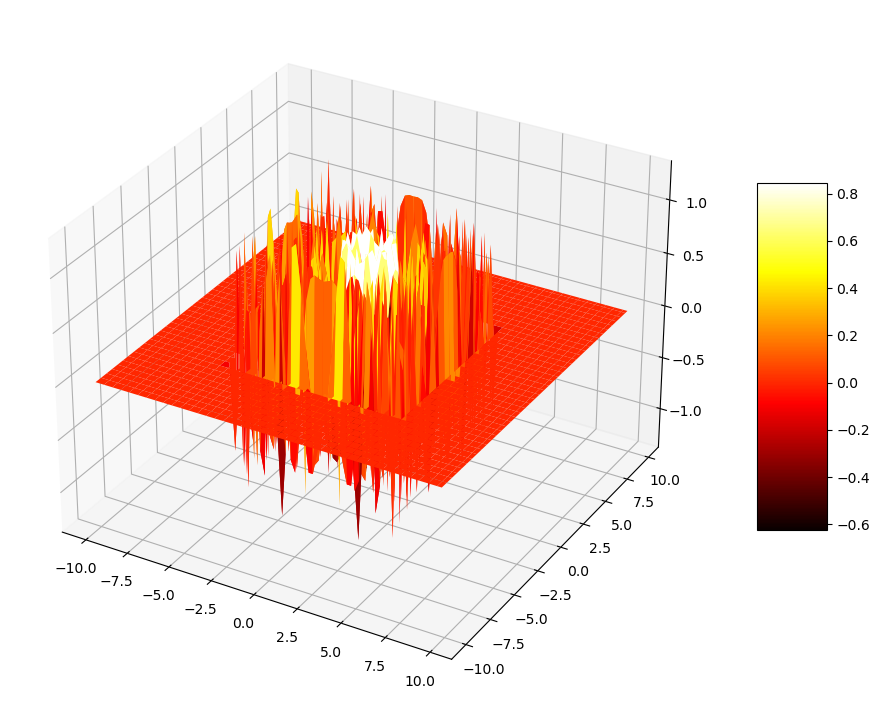

In [112]:
plot_3d_surface(xnew, ynew, znew)

In [1]:
x = float('inf')